<a href="https://colab.research.google.com/github/Jun-Liu-291/OCR-/blob/master/EMNIST_v1_pretrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/My Drive/dataset/EMNIST

!pwd

/content/drive/My Drive/dataset/EMNIST
/content/drive/My Drive/dataset/EMNIST


In [ ]:
import numpy as np
import pandas as pd

from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
train_data_path = 'emnist-balanced-train.csv'
test_data_path = 'emnist-balanced-test.csv'

In [ ]:
train_data = pd.read_csv(train_data_path, header=None)

train_data.shape

(112800, 785)

In [ ]:
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The first colum is the classification.
The other 784 colums are pixels value(28*28=784)

In [ ]:
# the lower case letters that are not included are same as corresponding upper case letters
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

num_classes_1 = len(class_mapping)
num_classes_2 = len(train_data[0].unique())

print('The number of classes is ', num_classes_2)
print('The length of the class_mapping is ', num_classes_1)

The number of classes is  47
The length of the class_mapping is  47


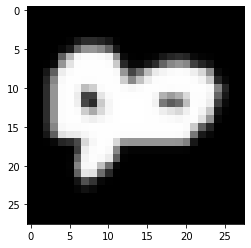

In [ ]:
temp_num = 1000

plt.imshow(train_data.values[temp_num, 1:].reshape([28, 28]), cmap='Greys_r')
plt.show()

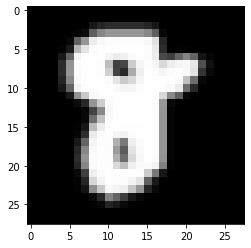

In [ ]:
img_flip = np.transpose(train_data.values[temp_num,1:].reshape(28, 28), axes=[1,0]) 
plt.imshow(img_flip, cmap='Greys_r')

plt.show()

In [ ]:
# define a function to show fliped image

def show_img(dataset, temp_num):
  img_flip = np.transpose(dataset.values[temp_num,1:].reshape(28, 28), axes=[1,0])
  plt.title('Class: ' + str(dataset.values[temp_num,0]) + ', Label: ' + str(class_mapping[dataset.values[temp_num,0]]))
  plt.imshow(img_flip, cmap='Greys_r')

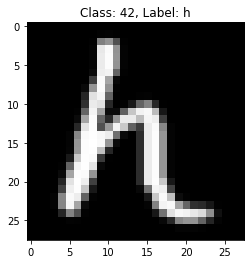

In [ ]:
show_img(train_data, 1220)

In [ ]:
# define a function returns (m, 28, 28, 1) shape dataset and label
def load_data_label(data_path, num_classes=None, img_size=None):
  data = pd.read_csv(data_path, header = None)
  m = len(data)
  if (num_classes==None):
    num_classes = len(data[0].unique())
  if (img_size==None):
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
  
  img_flip = np.transpose(data.values[:,1:].reshape(m, img_size, img_size, 1), axes=[0,2,1,3])
  labels = keras.utils.to_categorical(data.values[:,0], num_classes)

  return img_flip/255, labels


In [ ]:
X, y = load_data_label(train_data_path)
print('The data shape is: ',X.shape)
print('The label shape is: ',y.shape)

The data shape is:  (112800, 28, 28, 1)
The label shape is:  (112800, 47)


In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.1,
    rotation_range = 15,
    width_shift_range = .15,
    height_shift_range = .15,
)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(num_classes_1, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [ ]:
import tensorflow as tf

# setting the optimizer and learning rate
learning_rate = 1e-3
optimizer = tf.optimizers.Adam(learning_rate = learning_rate)
  
# Compile the model with the optimizer and learning rate specified in hpyarams
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:

# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = keras.callbacks.ReduceLROnPlateau(
    monitor="loss",
    factor = 0.5,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-10)

# save whole model when get a better val accuracy
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'EMNIST_t1.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_acc',
    mode='max',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 10))

In [ ]:
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=100,
                              validation_data=validation_data_generator,
                              callbacks = my_callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
500/500 [==============================] - 9s 17ms/step - loss: 2.3484 - acc: 0.3208 - val_loss: 1.1320 - val_acc: 0.6297 - lr: 0.0010
Epoch 2/100
500/500 [==============================] - 8s 17ms/step - loss: 0.9167 - acc: 0.6982 - val_loss: 0.6928 - val_acc: 0.7559 - lr: 0.0010
Epoch 3/100
500/500 [==============================] - 8s 17ms/step - loss: 0.6846 - acc: 0.7662 - val_loss: 0.6089 - val_acc: 0.7863 - lr: 0.0010
Epoch 4/100
500/500 [==============================] - 8s 17ms/step - loss: 0.5940 - acc: 0.7943 - val_loss: 0.5904 - val_acc: 0.7938 - lr: 0.0010
Epoch 5/100
500/500 [==============================] - 8s 17ms/step - loss: 0.5461 - acc: 0.8110 - val_loss: 0.5433 - val_acc: 0.8064 - lr: 0.0010
Epoch 6/100
500/500 [==============================] - 8s 17ms/step - loss: 0.5273 - acc: 0.8199 - val_loss: 0.5020 - val_acc: 0.8295 - lr: 0.0010
Epoch 7/100
500/500 [=====================

(1e-08, 0.001, 0.5, 4.0)

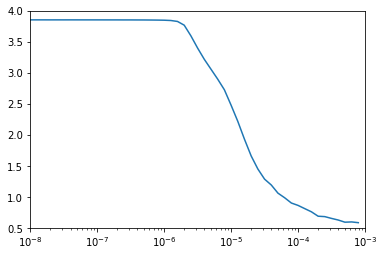

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-3, 0.5, 4])

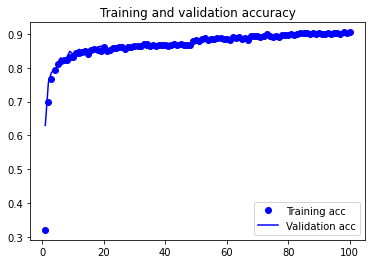

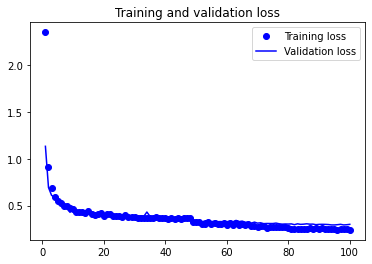

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('EMNIST_v1.h5')

In [ ]:
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=100,
                              validation_data=validation_data_generator,
                              callbacks = my_callbacks)

Epoch 1/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2519 - acc: 0.9024 - val_loss: 0.3006 - val_acc: 0.8968 - lr: 6.2500e-05
Epoch 2/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2424 - acc: 0.9046 - val_loss: 0.2971 - val_acc: 0.8963 - lr: 6.2500e-05
Epoch 3/100
500/500 [==============================] - 9s 17ms/step - loss: 0.2559 - acc: 0.9018 - val_loss: 0.2902 - val_acc: 0.8972 - lr: 6.2500e-05
Epoch 4/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2416 - acc: 0.9059 - val_loss: 0.2994 - val_acc: 0.8967 - lr: 6.2500e-05
Epoch 5/100
500/500 [==============================] - 9s 17ms/step - loss: 0.2463 - acc: 0.9032 - val_loss: 0.2981 - val_acc: 0.8995 - lr: 6.2500e-05
Epoch 6/100
500/500 [==============================] - 9s 17ms/step - loss: 0.2419 - acc: 0.9025 - val_loss: 0.2946 - val_acc: 0.8981 - lr: 6.2500e-05
Epoch 7/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2399 - acc: 0.90

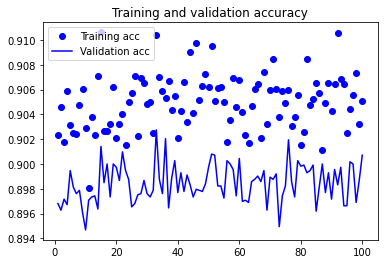

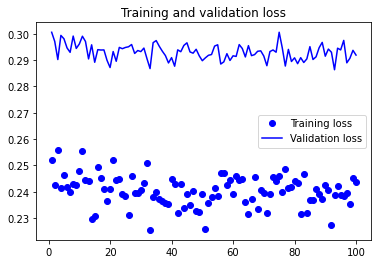

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=100,
                              validation_data=validation_data_generator,
                              callbacks = my_callbacks)

Epoch 1/100
500/500 [==============================] - 9s 18ms/step - loss: 0.2401 - acc: 0.9039 - val_loss: 0.2954 - val_acc: 0.8983 - lr: 1.0000e-06
Epoch 2/100
500/500 [==============================] - 9s 17ms/step - loss: 0.2342 - acc: 0.9065 - val_loss: 0.2944 - val_acc: 0.8996 - lr: 1.0000e-06
Epoch 3/100
500/500 [==============================] - 9s 17ms/step - loss: 0.2368 - acc: 0.9051 - val_loss: 0.2901 - val_acc: 0.8964 - lr: 1.0000e-06
Epoch 4/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2399 - acc: 0.9067 - val_loss: 0.2947 - val_acc: 0.8982 - lr: 1.0000e-06
Epoch 5/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2309 - acc: 0.9104 - val_loss: 0.2985 - val_acc: 0.8992 - lr: 1.0000e-06
Epoch 6/100
500/500 [==============================] - 8s 17ms/step - loss: 0.2351 - acc: 0.9070 - val_loss: 0.2875 - val_acc: 0.8990 - lr: 1.0000e-06
Epoch 7/100
500/500 [==============================] - 9s 17ms/step - loss: 0.2407 - acc: 0.90

In [ ]:
test_X, test_y = load_data_label(test_data_path)
test_data_generator = data_generator.flow(X, y)

model.evaluate_generator(test_data_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.2377006560564041, 0.9071364998817444]

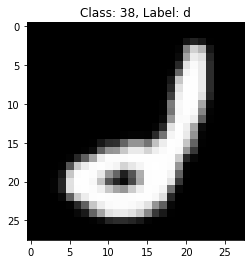

In [ ]:
test_data = pd.read_csv(test_data_path, header=None)
show_img(test_data, 123)

In [ ]:
def run_prediction(idx):
    result = np.argmax(model.predict(test_X[idx:idx+1]))
    print('Prediction: ', result, ', Char: ', class_mapping[result])
    print('Label: ', test_data.values[idx,0])
    show_img(test_data, idx)

Prediction:  20 , Char:  K
Label:  20
Prediction:  33 , Char:  X
Label:  33
Prediction:  39 , Char:  e
Label:  39
Prediction:  44 , Char:  q
Label:  44
Prediction:  16 , Char:  G
Label:  16
Prediction:  39 , Char:  e
Label:  39
Prediction:  12 , Char:  C
Label:  12
Prediction:  26 , Char:  Q
Label:  26
Prediction:  9 , Char:  9
Label:  9


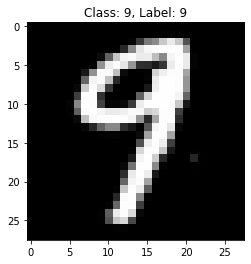

In [ ]:
import random

for _ in range(1,10):
    idx = random.randint(0, 47-1)
    run_prediction(idx)

38

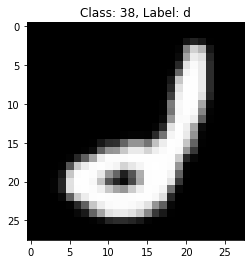

In [ ]:
show_img(test_data, 123)
np.argmax(test_y[123])